# Dataset
(Download from "https://www.kaggle.com/ayuraj/asl-dataset?fbclid=IwAR2QxnczQNqAt0MEbVaXcSIOuyuxlLbAed3VIj6xuv5Hu1DSboZuYVHCsnM")

# Reading dataset (function)

In [1]:
# CREATING X, Y
from keras import models, layers
import os
import cv2
import numpy as np

num_classes=36
IMG_SIZE = 100
def vectorize_data(dir_path):
    result = []
    labels = []
    for label in os.listdir(dir_path):
        path=os.path.join(dir_path, label)
        for img in os.listdir(path):
            path2 = os.path.join(path, img)
            i = cv2.imread(path2)
            i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
            i = cv2.resize(cv2.imread(path2, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            i = i.astype('float32')/255.0
            result.append(i)
            labels.append(label)
    return result, labels

# Training Data

In [2]:
x, y = vectorize_data('dataset/train')

x_train = np.array(x)
y_train = np.array(y)

x_train = np.expand_dims(x_train, axis=-1)
x_train.shape
y_train.shape


(1509,)

In [3]:
print(x_train.shape)
print(y_train.shape)

(1509, 100, 100, 1)
(1509,)


# Valadation Data

In [4]:
x, y = vectorize_data('dataset/val')

x_val = np.array(x)
y_val = np.array(y)

x_val = np.expand_dims(x_val, axis=-1)
x_val.shape
y_val.shape

(503,)

In [5]:
print(x_val.shape)
print(y_val.shape)

(503, 100, 100, 1)
(503,)


# Testing Data

In [6]:
x, y = vectorize_data('dataset/test')

x_test = np.array(x)
y_test = np.array(y)

x_test = np.expand_dims(x_test, axis=-1)
x_test.shape
y_test.shape

(503,)

In [7]:
print(x_test.shape)
print(y_test.shape)

(503, 100, 100, 1)
(503,)


In [8]:
from keras.utils.np_utils import to_categorical
dictonary = {'0':0 ,'1':1, '2':2, '3':3, '4':4 ,'5':5, '6':6, '7':7, '8':8, '9':9,'a':10, 'b':11, 'c':12, 'd':13, 
             'e':14, 'f':15, 'g':16, 'h':17, 'i':18, 'j':19, 'k':20, 'l':21, 'm':22,'n':23, 'o':24, 'p':25, 
            'q':26, 'r':27, 's':28, 't':29, 'u':30, 'v':31, 'w':32, 'x':33, 'y':34 , 'z':35}

num_classes=len(dictonary)
keys, inv = np.unique(y_train, return_inverse=True)

# TRAINING
vals = np.array([dictonary[key] for key in keys])
y_train_new = vals[inv]
y_train_new_cat = to_categorical(y_train_new, num_classes)


#VALADATION
keys, inv = np.unique(y_val, return_inverse=True)
vals = np.array([dictonary[key] for key in keys])
y_val_new = vals[inv]
y_val_new_cat = to_categorical(y_val_new, num_classes)


# SHUFFLE
def unison_shuffled_copies(a, b):
    p = np.random.permutation(len(a))
    return a[p], b[p]

x_new,y_new = unison_shuffled_copies(x_train,y_train_new_cat)
x_newval,y_newval = unison_shuffled_copies(x_val,y_val_new_cat)


# Building CNN

In [9]:
# MODEL CREATION
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

IMG_SIZE = 100
num_classes = 36
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=(IMG_SIZE, IMG_SIZE, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

# Training (and validation)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-best-model/the_best-model', monitor='val_loss', mode='min', 
    save_weights_only=False , save_best_only=True, verbose=1
    )

In [12]:
history = model.fit(x_new, y_new, 
          epochs = 10, 
          validation_data = (x_newval, y_newval), 
          shuffle = True, 
          batch_size = 2,
          callbacks=[checkpoint])

Epoch 1/10
752/755 [============================>.] - ETA: 0s - loss: 1.4321 - accuracy: 0.5911
Epoch 00001: val_loss improved from inf to 0.47699, saving model to saved-best-model\the_best-model
INFO:tensorflow:Assets written to: saved-best-model\the_best-model\assets
755/755 [==============================] - 12s 16ms/step - loss: 1.4293 - accuracy: 0.5918 - val_loss: 0.4770 - val_accuracy: 0.8270
Epoch 2/10
755/755 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8694
Epoch 00002: val_loss improved from 0.47699 to 0.25552, saving model to saved-best-model\the_best-model
INFO:tensorflow:Assets written to: saved-best-model\the_best-model\assets
755/755 [==============================] - 12s 16ms/step - loss: 0.3964 - accuracy: 0.8694 - val_loss: 0.2555 - val_accuracy: 0.9066
Epoch 3/10
754/755 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.9078
Epoch 00003: val_loss improved from 0.25552 to 0.22842, saving model to saved-best-model\the_b

# Visualizing Training and validation History

In [13]:
model.evaluate(x_new, y_new)

48/48 [==============================] - 1s 22ms/step - loss: 0.0264 - accuracy: 0.9907


[0.02639472670853138, 0.9907223582267761]

In [14]:
model.evaluate(x_newval,y_newval)

16/16 [==============================] - 0s 22ms/step - loss: 0.2111 - accuracy: 0.9483


[0.21108460426330566, 0.948310136795044]

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

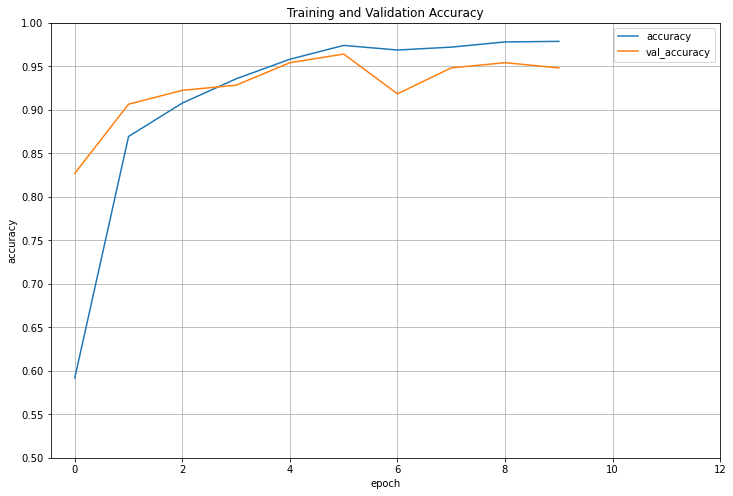

In [16]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 13, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

# Testing

In [17]:
keys, inv = np.unique(y_test, return_inverse=True)
vals = np.array([dictonary[key] for key in keys])
y_test_new = vals[inv]
y_test_new_cat = to_categorical(y_test_new,num_classes)
x_testnew,y_testnew = unison_shuffled_copies(x_test,y_test_new_cat)

In [18]:
model.evaluate(x_testnew, y_testnew)

16/16 [==============================] - 0s 23ms/step - loss: 0.1165 - accuracy: 0.9702


[0.11647795885801315, 0.9701789021492004]

# Save model

In [19]:
model.save("engmodel.h5")

# Camera 

In [20]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2
import imutils
from keras.models import load_model
from PIL import Image, ImageDraw
import os
import numpy as np
from translate import Translator
from gtts import gTTS 
from playsound import playsound 
import mediapipe as mp
import time

In [22]:
model = load_model("engmodel.h5")
IMG_SIZE = 100
top, right, bottom, left = 10, 350, 225, 590
SAVE_PATH = "C:/Users/Andalus/Final"

# Function for voice

In [23]:
from playsound import playsound 
def voice(vo):
    language = 'en'
    myobj = gTTS(text=string, lang=language, slow=False)
    myobj.save("hi.mp3")
    os.system("mpg321 hi.mp3")
    playsound("hi.mp3")

In [24]:
img_count = 1
dictonary = {'0':0 ,'1':1, '2':2, '3':3, '4':4 ,'5':5, '6':6, '7':7, '8':8, '9':9,'a':10, 'b':11, 'c':12, 'd':13, 
             'e':14, 'f':15, 'g':16, 'h':17, 'i':18, 'j':19, 'k':20, 'l':21, 'm':22,'n':23, 'o':24, 'p':25, 
            'q':26, 'r':27, 's':28, 't':29, 'u':30, 'v':31, 'w':32, 'x':33, 'y':34 , 'z':35}
num_class = len(dictonary)
out = ""
text = ""
inv_dictonary = dict(map(reversed, dictonary.items()))
string = ""

camera = cv2.VideoCapture(0)
success, frame = camera.read()
segmentor=SelfiSegmentation()         #segmentation
 

while success:
    
    gray_frame = cv2.flip(frame, 1)
    cv2.rectangle(gray_frame, (left, top), (right, bottom), (0,255,0), 2)
    roi = gray_frame[top:bottom, right:left]
    roi=segmentor.removeBG(roi,(0,0,0))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Segmentation", roi)
    
    
    key = cv2.waitKey(1)
    if key == 36:
        break
    if key == ord('q'):                         #exit
        break
    
    
    
    # PREDICTION
    roi = cv2.resize(roi, (IMG_SIZE, IMG_SIZE))
    roi = np.expand_dims(roi, axis=-1)
    roi = np.expand_dims(roi, axis=0)
    p = model.predict(roi)
    p2 = np.argmax(p)
    out = inv_dictonary[p2]
    #PREDICTION ENDS
    

    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(gray_frame,out, (22,34), font, 1, (200,255,255), 2, cv2.LINE_AA)
    cv2.putText(gray_frame,string, (22,64), font, 1, (200,255,255), 2, cv2.LINE_AA)
    
    
    cv2.imshow("Sign Language Translator", gray_frame)
    
    
    if key == ord('a'):                         #append
        string = string+""+out
        
    if key == ord('v'):                         #voice
        voice(string)
         
    if key ==ord('b'):                            # Backspace
        string= string[:-1]
        
    if key == ord('s'):                           #space
        string= string +" "
       
    if key == ord('r'):                            #clear
        roi = frame[top:bottom, right:left]
        string = ""

    if key == ord('c'):                             #screen
        img_name = "data{}.png".format(img_count)
        img_count+=1
        cv2.imwrite(os.path.join(SAVE_PATH, img_name), gray_frame)
        

    success, frame = camera.read()
      
camera.release()
cv2.destroyAllWindows()